In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/kaggle.json'

In [ ]:
!kaggle datasets download -p XXX -d dgomonov/new-york-city-airbnb-open-data #replace XXX with API key from Kaggle

In [ ]:
!pip install -q tensorflow_data_validation[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.3 MB/s eta 0:00:00


In [ ]:
import tensorflow_data_validation as tfdv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import shutil
plt.style.use('ggplot')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [ ]:
!ls /content

AB_NYC_2019.csv  new-york-city-airbnb-open-data.zip  New_York_City_.png


In [ ]:
# Replace 'downloaded_dataset.zip' with the actual zip file name
zip_file = '/content/XXX/new-york-city-airbnb-open-data.zip' #replace XXX with API key from Kaggle

# Extract the zip file to the same directory
shutil.unpack_archive(zip_file, '/content/XXX', 'zip') #replace XXX with API key from Kaggle

In [ ]:
!ls /content/XXX #replace XXX with API key from Kaggle

In [ ]:
df = pd.read_csv('/content/XXX/AB_NYC_2019.csv') #replace XXX with API key from Kaggle

In [ ]:
# check the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# check the heading of the dataset
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# check the count, mean, std, min, max, 25%, 50%, and 75% percentile of each attribute
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


We will only consider Airbnb listings with more than 10 reviews to ensure that the listings considered are credible listings.

In [ ]:
# Filtered dataframe with condition 'number_of_reviews' greater than or equal to 10.
airbnb_df = df[df['number_of_reviews']>=10]

In [ ]:
stats = tfdv.generate_statistics_from_dataframe(dataframe=airbnb_df)
tfdv.visualize_statistics(stats)

In [ ]:
# check the missing values in the dataset
airbnb_df.isnull().sum()

id                                 0
name                               1
host_id                            0
host_name                         10
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

<Axes: title={'center': 'Proportion of Airbnb listings across boroughs'}>

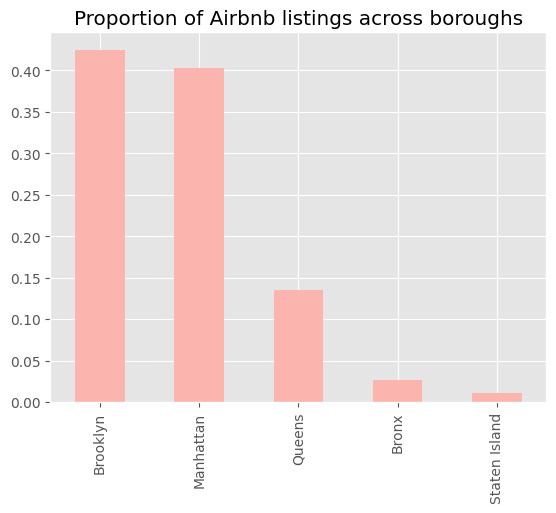

In [ ]:
# obtain a bar chart of the proportion of Airbnb listings in five boroughs
(airbnb_df.neighbourhood_group.value_counts()/airbnb_df.shape[0]).plot.bar(cmap='Pastel1',title='Proportion of Airbnb listings across boroughs')

<Axes: title={'center': 'Proportion of Airbnb listings in room_type'}>

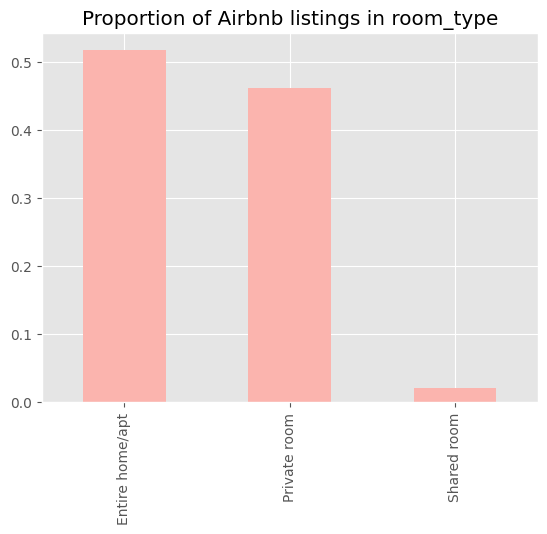

In [ ]:
# obtain a bar chart of the proportion of Airbnb listings in room_type
(airbnb_df.room_type.value_counts()/airbnb_df.shape[0]).plot.bar(cmap='Pastel1',title='Proportion of Airbnb listings in room_type')

In [ ]:
# obtain a dataframe of average price across five boroughs in room_type
pd.DataFrame(airbnb_df.groupby(['neighbourhood_group','room_type']).mean()['price'])

<ipython-input-55-e1d1b0b3f4dc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(airbnb_df.groupby(['neighbourhood_group','room_type']).mean()['price'])


price
neighbourhood_group room_type                  
Bronx               Entire home/apt  118.168317
                    Private room      54.237942
                    Shared room       43.076923
Brooklyn            Entire home/apt  164.191258
                    Private room      73.743515
                    Shared room       42.291667
Manhattan           Entire home/apt  229.420586
                    Private room     100.239801
                    Shared room       74.082051
Queens              Entire home/apt  134.449449
                    Private room      63.522639
                    Shared room       45.521739
Staten Island       Entire home/apt  116.250000
                    Private room      53.452830

In [ ]:
# obtain a dataframe of average availability_365 across five boroughs in room_type
pd.DataFrame(airbnb_df.groupby(['neighbourhood_group','room_type']).mean()['availability_365'])

<ipython-input-56-7b87216521dc>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(airbnb_df.groupby(['neighbourhood_group','room_type']).mean()['availability_365'])


availability_365
neighbourhood_group room_type                        
Bronx               Entire home/apt        176.841584
                    Private room           180.546624
                    Shared room            188.230769
Brooklyn            Entire home/apt        134.690564
                    Private room           140.631286
                    Shared room            171.316667
Manhattan           Entire home/apt        122.031811
                    Private room           127.181252
                    Shared room            153.112821
Queens              Entire home/apt        168.280280
                    Private room           171.953428
                    Shared room            199.130435
Staten Island       Entire home/apt        192.170000
                    Private room           250.273585

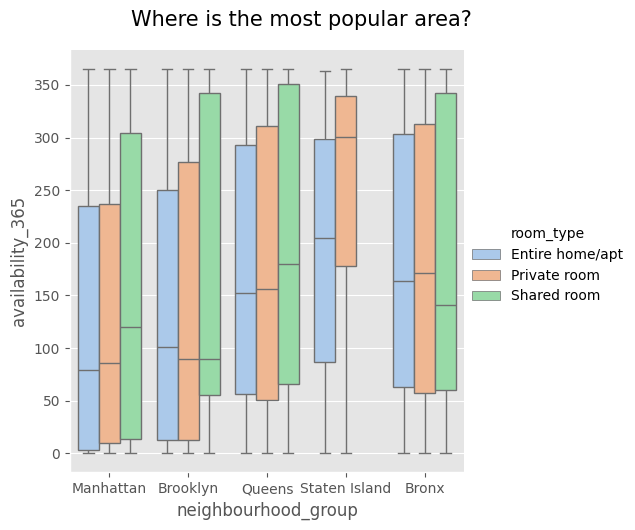

In [ ]:
# Availability according to different room_type in different areas
fig = sns.catplot(x='neighbourhood_group',y='availability_365',kind='box',hue='room_type',data=airbnb_df,palette='pastel')
fig.fig.suptitle('Where is the most popular area?',fontsize=15,y=1.05)
fig.savefig('popular_area.png', bbox_inches = 'tight')

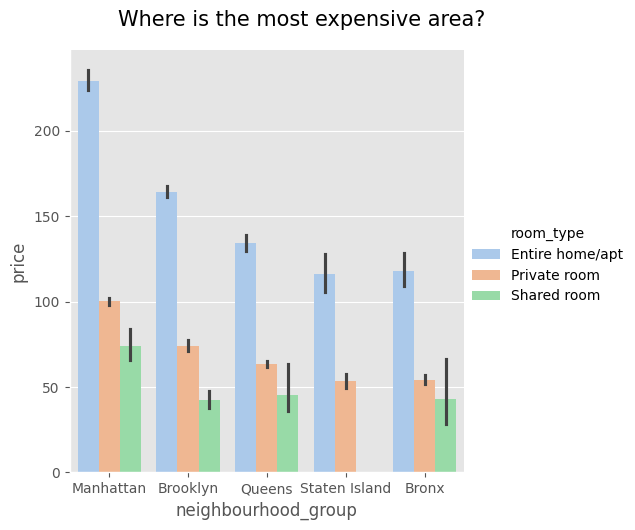

In [ ]:
# Price according to different room_type in different areas
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=airbnb_df,kind='bar',hue='room_type',palette='pastel')
fig2.fig.suptitle('Where is the most expensive area?',fontsize=15,y=1.05)
fig2.savefig('price_area.png', bbox_inches = 'tight')

In [ ]:
airbnb_df['revenue'] = (365-airbnb_df['availability_365'])*airbnb_df['price']
airbnb_df['total_revenue'] = airbnb_df.groupby('host_id')['revenue'].transform(sum)
airbnb_df['average_revenue'] = airbnb_df['total_revenue']/airbnb_df['calculated_host_listings_count']

<ipython-input-60-388acefe7f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df['revenue'] = (365-airbnb_df['availability_365'])*airbnb_df['price']
<ipython-input-60-388acefe7f17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df['total_revenue'] = airbnb_df.groupby('host_id')['revenue'].transform(sum)
<ipython-input-60-388acefe7f17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

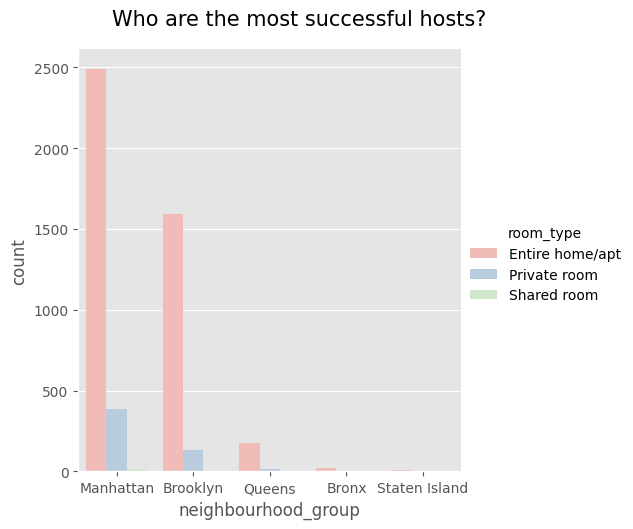

In [ ]:
# The count of the 75% percentile hosts according to different room_type in different areas
df2 = airbnb_df[airbnb_df['average_revenue']>=airbnb_df['average_revenue'].quantile(0.75)]
fig3 = sns.catplot(x='neighbourhood_group',data=df2,hue='room_type',kind='count',palette='Pastel1')
fig3.fig.suptitle('Who are the most successful hosts?',fontsize=15,y=1.05)
fig3.savefig('host.png', bbox_inches = 'tight')

In [ ]:
airbnb_df['average_revenue'].quantile(0.75)

37328.0

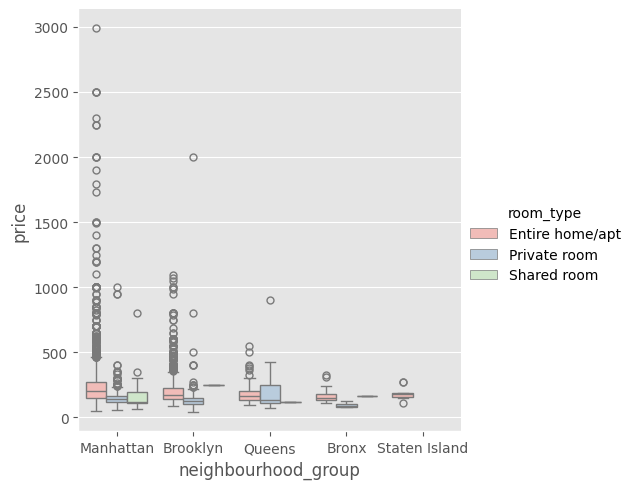

In [ ]:
sns.catplot(x='neighbourhood_group',y='price',data=df2,hue='room_type',kind='box',palette='Pastel1')

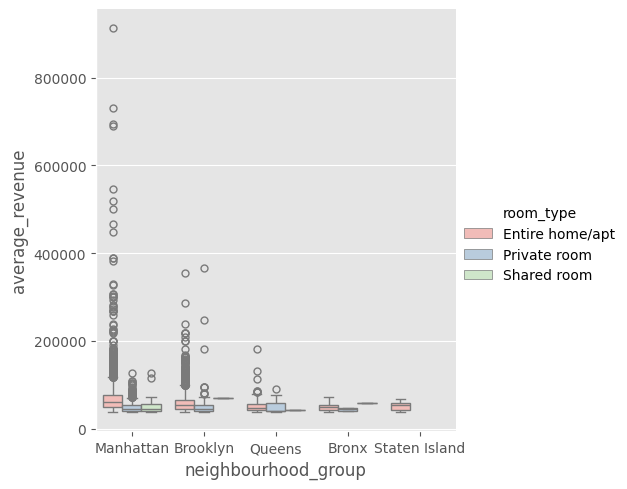

In [ ]:
sns.catplot(x='neighbourhood_group',y='average_revenue',data=df2,hue='room_type',kind='box',palette='Pastel1')

Create a schema for our data to understand data type, numerical/categorical, frequency of its presence.

In [ ]:
schema = tfdv.infer_schema(statistics=stats)
tfdv.display_schema(schema=schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'id',INT,required,,-
'name',BYTES,optional,single,-
'host_id',INT,required,,-
'host_name',BYTES,optional,single,-
'neighbourhood_group',STRING,required,,'neighbourhood_group'
'neighbourhood',BYTES,required,,-
'latitude',FLOAT,required,,-
'longitude',FLOAT,required,,-
'room_type',STRING,required,,'room_type'


,Values
Domain,
'neighbourhood_group',"'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'"
'room_type',"'Entire home/apt', 'Private room', 'Shared room'"


We will now try train various machine learning models to predict the price of the airbnb.

First we need to detect the outliers in our dependent variable, price.

<ipython-input-70-54b692ae79ac>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb_df['price'], shade=True, ax=axs[0])


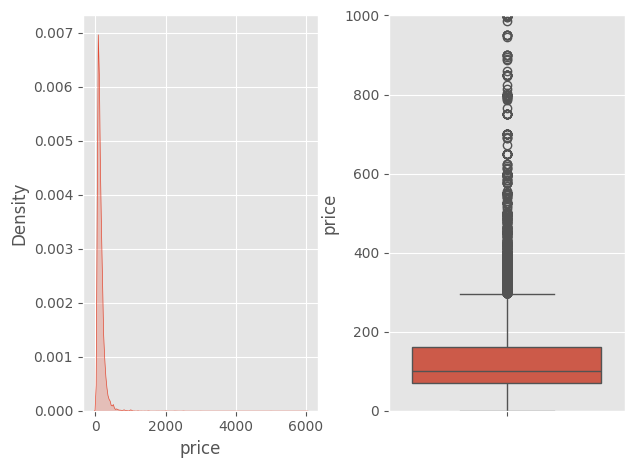

In [ ]:
# Subplots consisting of the Density Plot and Box Plot of dependent variable 'price' column
fig, axs = plt.subplots(1,2)
fig.tight_layout(pad=2.0)

# Density Plot for frequency distribution of continuous numeric column 'price'
sns.kdeplot(airbnb_df['price'], shade=True, ax=axs[0])

# Box Plot to detect potential outliers in our 'price' column
sns.boxplot(y=airbnb_df['price'], ax=axs[1])
plt.ylim(0,1000)
plt.show()

<ipython-input-71-3bb04c47ba7c>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb_df['price'], shade=True)


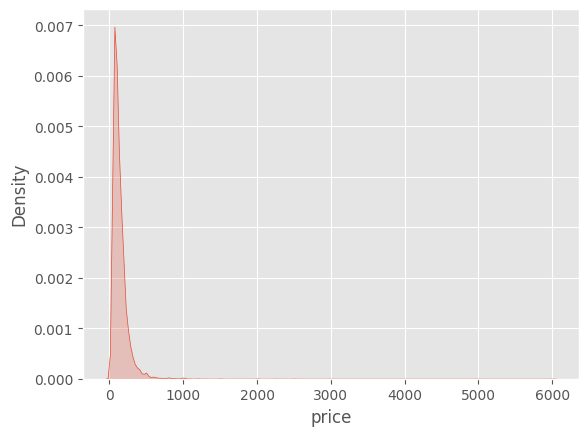

In [ ]:
# Density plot for frequency distribution of continuous numeric column 'price' - After setting the minimum and maximum limit for 'price' column and handling outliers due to 'property_type' column
sns.kdeplot(airbnb_df['price'], shade=True)
plt.show()

In [ ]:
# Percentage of missing values in columns/attributes
round(airbnb_df.isnull().sum()/airbnb_df.shape[0]*100,2)

id                                0.00
name                              0.01
host_id                           0.00
host_name                         0.05
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       0.00
reviews_per_month                 0.00
calculated_host_listings_count    0.00
availability_365                  0.00
revenue                           0.00
total_revenue                     0.00
average_revenue                   0.00
dtype: float64

Adding "number of competitors" feature

In [ ]:
dict_local_competitors = airbnb_df.groupby('neighbourhood')['price'].count().to_dict()

In [ ]:
airbnb_df['number_of_competitors'] = [dict_local_competitors[item]-1 for item in airbnb_df['neighbourhood']]
airbnb_df.head()

<ipython-input-74-cea3d44dadfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df['number_of_competitors'] = [dict_local_competitors[item]-1 for item in airbnb_df['neighbourhood']]


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue,total_revenue,average_revenue,number_of_competitors
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2250,2250,1125.0,352
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,15219,15219,15219.0,224
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,47200,47200,47200.0,88
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,21900,21900,21900.0,1735
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,11455,11455,11455.0,760


In [ ]:
# This temporary dataframe includes all our possible independent variables and dependent variable
airbnb_df_temp = airbnb_df.drop(['id','name','host_id','host_name','neighbourhood_group','latitude','longitude','calculated_host_listings_count'],axis=1)
airbnb_df_temp.columns

Index(['neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'revenue', 'total_revenue', 'average_revenue',
       'number_of_competitors'],
      dtype='object')

<ipython-input-77-424db3c40912>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = airbnb_df_temp.corr()


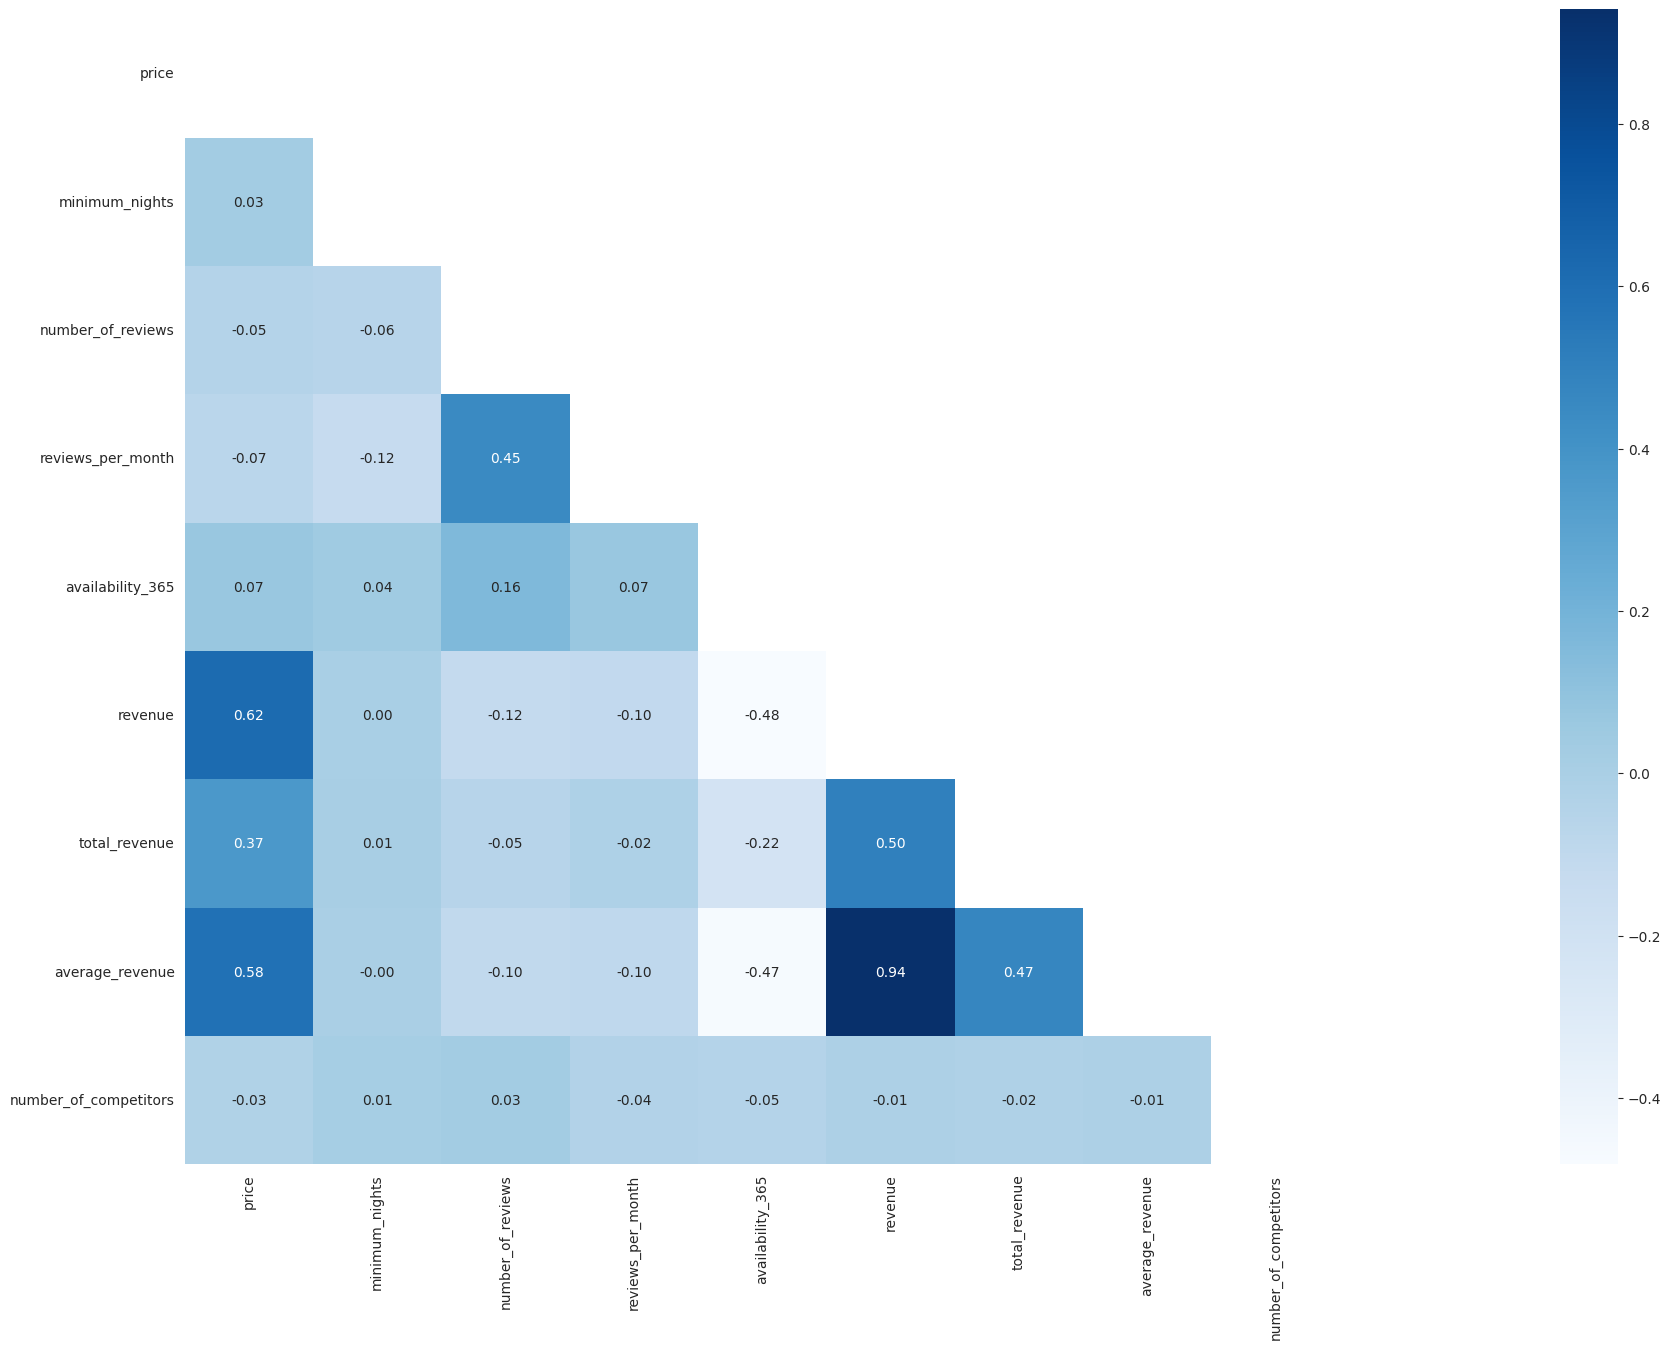

In [ ]:
# Heatmap using seaborn indicating pairwise Pearson correlations of numeric variables
corr = airbnb_df_temp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(57, 15))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap="Blues", annot=True, fmt=".2f")

Predictive Power Score (PPS)

What PPS is doing here is, it is seeing how the predictive performance of our Decision Tree Regressor model with one independent variable and dependent variable is as compared to the baseline model or null model (model which will always predict the median value).
Predictive Power Score can be used along with the Heatmap to do the initial feature selection for our model. Since Heatmap doesn't involve text variables, this is where Predictive Power Score can be effective.

In [ ]:
pip install ppscore

  Preparing metadata (setup.py) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=1bffc4dc1200dc45866c275c93aa0aa7a8d918b0d34435def6c20ef6aaec8497
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore


In [ ]:
import ppscore as pps
pps.score(airbnb_df_temp, "neighbourhood", "price")

{'x': 'neighbourhood',
 'y': 'price',
 'ppscore': 0.05243666082067344,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 66.9816,
 'model_score': 63.46930855957398,
 'model': DecisionTreeRegressor()}

In [ ]:
# List of top 50 Neighbourhoods with high number of listings
neighbourhood_top50 = airbnb_df_temp['neighbourhood'].value_counts().head(50).index.tolist()
neighbourhood_top50

['Bedford-Stuyvesant',
 'Williamsburg',
 'Harlem',
 'Bushwick',
 "Hell's Kitchen",
 'East Village',
 'Crown Heights',
 'Upper West Side',
 'Upper East Side',
 'East Harlem',
 'Chelsea',
 'Lower East Side',
 'Greenpoint',
 'Midtown',
 'Washington Heights',
 'Astoria',
 'West Village',
 'Flushing',
 'Flatbush',
 'Prospect-Lefferts Gardens',
 'East Flatbush',
 'Clinton Hill',
 'Park Slope',
 'Long Island City',
 'Fort Greene',
 'Chinatown',
 'Sunset Park',
 'Prospect Heights',
 'Sunnyside',
 'Financial District',
 'SoHo',
 'Ridgewood',
 'Greenwich Village',
 'Gramercy',
 'Ditmars Steinway',
 'Jamaica',
 'South Slope',
 'East Elmhurst',
 'East New York',
 'Kips Bay',
 'Gowanus',
 'Elmhurst',
 'Nolita',
 'Carroll Gardens',
 'Morningside Heights',
 'Canarsie',
 'Jackson Heights',
 'Murray Hill',
 'Inwood',
 'Cypress Hills']

In [ ]:
medianprice_neighbourhood = airbnb_df_temp.groupby(['neighbourhood']).median()['price']
medianprice_neighbourhood

<ipython-input-82-aec26424b42c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medianprice_neighbourhood = airbnb_df_temp.groupby(['neighbourhood']).median()['price']


neighbourhood
Allerton            69.0
Arden Heights       75.0
Arrochar            65.5
Arverne            144.5
Astoria             80.5
                   ...  
Williamsburg       115.0
Windsor Terrace    124.0
Woodhaven           51.5
Woodlawn            35.0
Woodside            80.0
Name: price, Length: 211, dtype: float64

In [ ]:
import ppscore as pps
pps.score(airbnb_df_temp, "room_type", "price")

{'x': 'room_type',
 'y': 'price',
 'ppscore': 0.16822830757052665,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 66.9816,
 'model_score': 55.71339879363401,
 'model': DecisionTreeRegressor()}

From PPS, we see that having 'neighbourhood' or 'room_type' alone as independent variable in our model performs better than the null model or baseline model. So definitely, both these variables should be included as independent variables or predictors in our model.|

We need to deal with 'neighbourhood' and 'room_type' and perform text encoding since most ML models deal with numeric data.

In [ ]:
# The resulting dataframe includes the independent variables and the dependent variable for our predictive model.
airbnb_df_model = airbnb_df_temp[['neighbourhood','room_type','price']]
airbnb_df_model.head(10)

,neighbourhood,room_type,price
1,Midtown,Entire home/apt,225
3,Clinton Hill,Entire home/apt,89
5,Murray Hill,Entire home/apt,200
6,Bedford-Stuyvesant,Private room,60
7,Hell's Kitchen,Private room,79
8,Upper West Side,Private room,79
9,Chinatown,Entire home/apt,150
10,Upper West Side,Entire home/apt,135
11,Hell's Kitchen,Private room,85
12,South Slope,Private room,89


In [ ]:
print("There are a total of {0} unique values in the 'neighbourhood' column.".format(airbnb_df_model['neighbourhood'].nunique()))
airbnb_df_model['neighbourhood'].value_counts()

There are a total of 211 unique values in the 'neighbourhood' column.


Bedford-Stuyvesant    1736
Williamsburg          1444
Harlem                1234
Bushwick               901
Hell's Kitchen         761
                      ... 
Neponsit                 1
Grymes Hill              1
Richmondtown             1
Rossville                1
Holliswood               1
Name: neighbourhood, Length: 211, dtype: int64

We see that our independent text variable 'neighbourhood' has 211 unique categories and so doing a complete one hot encoding here won't be the right approach since it will lead to 210 dummy variables which will lead to high dimensionality and thus will lead to memory issues and complexities. So we need to use another approach here. Hence, initially let's go with - Partial One Hot Encoding which reduces the dimensionality avoiding memory issues, however there might be some information loss since multiple less frequent categories will be grouped as 'Other'.

In [ ]:
neighbourhood_top50 = airbnb_df_model['neighbourhood'].value_counts().head(50).index.tolist()
neighbourhood_top50

['Bedford-Stuyvesant',
 'Williamsburg',
 'Harlem',
 'Bushwick',
 "Hell's Kitchen",
 'East Village',
 'Crown Heights',
 'Upper West Side',
 'Upper East Side',
 'East Harlem',
 'Chelsea',
 'Lower East Side',
 'Greenpoint',
 'Midtown',
 'Washington Heights',
 'Astoria',
 'West Village',
 'Flushing',
 'Flatbush',
 'Prospect-Lefferts Gardens',
 'East Flatbush',
 'Clinton Hill',
 'Park Slope',
 'Long Island City',
 'Fort Greene',
 'Chinatown',
 'Sunset Park',
 'Prospect Heights',
 'Sunnyside',
 'Financial District',
 'SoHo',
 'Ridgewood',
 'Greenwich Village',
 'Gramercy',
 'Ditmars Steinway',
 'Jamaica',
 'South Slope',
 'East Elmhurst',
 'East New York',
 'Kips Bay',
 'Gowanus',
 'Elmhurst',
 'Nolita',
 'Carroll Gardens',
 'Morningside Heights',
 'Canarsie',
 'Jackson Heights',
 'Murray Hill',
 'Inwood',
 'Cypress Hills']

In [ ]:
airbnb_df_model['neighbourhood'] = [item if item in neighbourhood_top50 else 'Other' for item in airbnb_df_model['neighbourhood']]
airbnb_df_model['neighbourhood'].value_counts()/airbnb_df_model.shape[0]*100

<ipython-input-96-aa09ac6ca2f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_df_model['neighbourhood'] = [item if item in neighbourhood_top50 else 'Other' for item in airbnb_df_model['neighbourhood']]


Other                        14.250323
Bedford-Stuyvesant            8.960000
Williamsburg                  7.452903
Harlem                        6.369032
Bushwick                      4.650323
Hell's Kitchen                3.927742
East Village                  3.798710
Crown Heights                 3.334194
Upper West Side               3.323871
Upper East Side               3.189677
East Harlem                   2.843871
Chelsea                       1.956129
Lower East Side               1.950968
Greenpoint                    1.832258
Washington Heights            1.821935
Midtown                       1.821935
Astoria                       1.785806
West Village                  1.460645
Flushing                      1.295484
Flatbush                      1.274839
Prospect-Lefferts Gardens     1.249032
East Flatbush                 1.212903
Clinton Hill                  1.161290
Park Slope                    1.135484
Long Island City              1.125161
Fort Greene              

In [ ]:
print("There are a total of {0} unique values in the 'room_type' column.".format(airbnb_df_model['room_type'].nunique()))
airbnb_df_model['room_type'].value_counts()

There are a total of 3 unique values in the 'room_type' column.


Entire home/apt    10026
Private room        8952
Shared room          397
Name: room_type, dtype: int64

In [ ]:
#OneHotEncoding Categorical Variables using get_dummies for ML modeling
airbnb_df_model = pd.get_dummies(airbnb_df_model, prefix_sep='_', drop_first=True)
print(airbnb_df_model.shape)
airbnb_df_model.head()

(19375, 53)


,price,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Cypress Hills,...,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,room_type_Private room,room_type_Shared room
1,225,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,200,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,60,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Train and Test Split and Data Scaling for Model Training

In [ ]:
# Independent variables/Explanatory variables/Predictors
X = airbnb_df_model.drop(['price'],axis=1)

# Dependent variable/Response variable/Target variable
y = airbnb_df_model['price']

#Scaling is very important as it brings all the features on a similar scale and helps algorithms perform better or converge faster
from sklearn.preprocessing import StandardScaler
print('We will be using StandardScaler because we want our outliers to have reduced influence due to normalization.')

from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_train

We will be using StandardScaler because we want our outliers to have reduced influence due to normalization.


array([[-0.31482792, -0.21739063, -0.07305674, ..., -0.28457334,
         1.07730509, -0.14833921],
       [-0.31482792, -0.21739063, -0.07305674, ..., -0.28457334,
        -0.92824215, -0.14833921],
       [-0.31482792, -0.21739063, -0.07305674, ...,  3.51403261,
         1.07730509, -0.14833921],
       ...,
       [-0.31482792, -0.21739063, -0.07305674, ..., -0.28457334,
        -0.92824215, -0.14833921],
       [-0.31482792, -0.21739063, -0.07305674, ..., -0.28457334,
        -0.92824215, -0.14833921],
       [-0.31482792, -0.21739063, -0.07305674, ..., -0.28457334,
        -0.92824215, -0.14833921]])

Regression Analysis - Linear Regression or Multiple Linear Regression (OLS method)

In [ ]:
# Learning the train data using Linear Regression (OLS) to find the best fit line or predicted line that minimizes the sum of squared errors
from sklearn import linear_model

# Instance of trained model using Linear Regression before checking for assumptions of OLS
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()